# NATS3100: Practical 5 (Logistic regression and decision trees, weeks 6 and 7) 

### William Makins-Elliott 201447107

imports + file opening:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import glm
import statsmodels.api as sm
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from scipy.stats import norm
from sklearn import metrics
from sklearn import tree
from collections import Counter

brexitdf = pd.read_csv('brexit.csv') #reads the file and generates a pandas dataframe.
print(brexitdf)

         abc1  notBornUK  medianIncome  medianAge  withHigherEd  voteBrexit
0    0.133641   0.012605      0.252577   0.500000      0.085526        True
1    0.129032   0.113445      0.108247   0.272727      0.111842        True
2    0.161290   0.004202      0.128866   0.636364      0.118421        True
3    0.322581   0.046218      0.226804   0.454545      0.217105        True
4    0.345622   0.058824      0.201031   0.545455      0.243421        True
..        ...        ...           ...        ...           ...         ...
339  0.000000   0.000000      0.139175   0.545455      0.026316        True
340  0.216590   0.012605      0.237113   0.545455      0.157895        True
341  0.516129   0.042017      0.371134   0.772727      0.480263       False
342  0.258065   0.037815      0.139175   0.818182      0.309211        True
343  0.124424   0.046218      0.164948   0.454545      0.092105        True

[344 rows x 6 columns]


# Q1. Fit a logistic regression models using all of the available inputs. Identify the direction of each effect from the fitted coefficients. Compare these with the plots shown on the Guardian website. Do they agree? Explain. (1.5 mark)

Below is the fitted logistic regression model using all inputs.

In [2]:
formulaQ1 = 'voteBrexit ~ abc1 + notBornUK + medianIncome + medianAge + withHigherEd'
Q1glm = glm(formulaQ1, brexitdf,family=sm.families.Binomial()).fit()
print(Q1glm.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['voteBrexit[False]', 'voteBrexit[True]']   No. Observations:                  344
Model:                                                   GLM   Df Residuals:                      338
Model Family:                                       Binomial   Df Model:                            5
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -123.69
Date:                                       Thu, 23 Mar 2023   Deviance:                       247.39
Time:                                               12:47:16   Pearson chi2:                     401.
No. Iterations:                                            6   Pseudo R-squ. (CS):             0.4059
Covariance Type:                                   nonrobust                      

## Direction Of Each Variable:
abc1: The greater the proportion of the population in the abc1 social class the more likley they are to remain in the EU.

notBornUK: The greater the proportion of the population not born in the UK the more likley they are to remain in the EU. 

medianIncome: The greater the median income of the population the more likely they are to remian in the EU.

medianAge: The greater the median age of the population the more likely they are to leave the EU.

withHigherEd: The greater the the proportion of the population with higher education the more likey they are to remain in the EU.

## Comparing To Plots On The Guardian Website:
To compare the regression results to the plots on the Guradian website I repeated the regression model above but trained it on 70% of the data. I then used the '.predict' function to predict the results of the remaining 30% of the data. I then plotted the results from this 30% test data. The graphs are shown below in the same layout of the Guardian graphs to make comparision easier. 


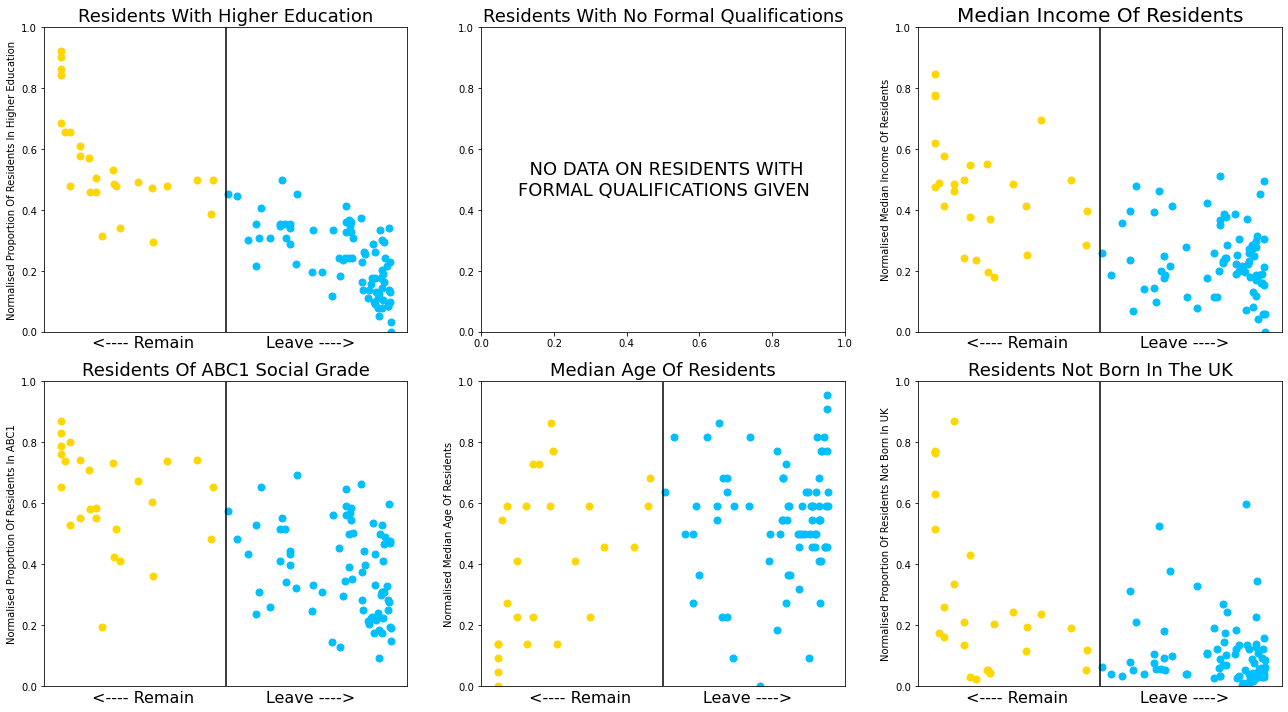

In [3]:
train_data, test_data = train_test_split(brexitdf, test_size=0.3)
Otherglm = glm(formulaQ1, train_data,family=sm.families.Binomial()).fit()
prediction_args = {'abc1':test_data['abc1'],'notBornUK':test_data['notBornUK'],'medianIncome':test_data['medianIncome'],'medianAge':test_data['medianAge'],'withHigherEd':test_data['withHigherEd']}
predictions = Otherglm.predict(prediction_args)
adj_predictions = np.subtract(1,predictions)
fig, axs = plt.subplots(2, 3,figsize=(18, 10))
axs[0,0].plot(adj_predictions[adj_predictions<0.5],test_data['withHigherEd'][adj_predictions<0.5],'o',color='gold',markersize=7,label='20% Prediction')
axs[0,0].plot(adj_predictions[adj_predictions>0.5],test_data['withHigherEd'][adj_predictions>0.5],'o',color='deepskyblue',markersize=7,label='20% Prediction')
axs[0,0].set_title('Residents With Higher Education',fontsize=18)
axs[0,0].vlines(0.5,0,1,'k')
axs[0,0].set_ylim(0,1)
axs[0,0].set_ylabel('Normalised Proportion Of Residents In Higher Education')
axs[0,0].set_xlabel('<---- Remain              Leave ----> ',fontsize=16)
axs[0,0].tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=False) 
axs[0,1].annotate('  NO DATA ON RESIDENTS WITH \nFORMAL QUALIFICATIONS GIVEN',xy=(0.3,0.5),xytext=(0.1,0.45),fontsize=18)
axs[0,1].set_title('Residents With No Formal Qualifications',fontsize=18)
axs[0,2].plot(adj_predictions[adj_predictions<0.5],test_data['medianIncome'][adj_predictions<0.5],'o',color='gold',markersize=7,label='20% Prediction')
axs[0,2].plot(adj_predictions[adj_predictions>0.5],test_data['medianIncome'][adj_predictions>0.5],'o',color='deepskyblue',markersize=7,label='20% Prediction')
axs[0,2].set_title('Median Income Of Residents',fontsize=20)
axs[0,2].vlines(0.5,0,1,'k')
axs[0,2].set_ylim(0,1)
axs[0,2].set_ylabel('Normalised Median Income Of Residents')
axs[0,2].set_xlabel('<---- Remain              Leave ----> ',fontsize=16)
axs[0,2].tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=False) 
axs[1,0].plot(adj_predictions[adj_predictions<0.5],test_data['abc1'][adj_predictions<0.5],'o',color='gold',markersize=7,label='20% Prediction')
axs[1,0].plot(adj_predictions[adj_predictions>0.5],test_data['abc1'][adj_predictions>0.5],'o',color='deepskyblue',markersize=7,label='20% Prediction')
axs[1,0].set_title('Residents Of ABC1 Social Grade',fontsize=18)
axs[1,0].vlines(0.5,0,1,'k')
axs[1,0].set_ylim(0,1)
axs[1,0].set_ylabel('Normalised Proportion Of Residents In ABC1')
axs[1,0].set_xlabel('<---- Remain              Leave ----> ',fontsize=16)
axs[1,0].tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=False) 
axs[1,1].plot(adj_predictions[adj_predictions<0.5],test_data['medianAge'][adj_predictions<0.5],'o',color='gold',markersize=7,label='20% Prediction')
axs[1,1].plot(adj_predictions[adj_predictions>0.5],test_data['medianAge'][adj_predictions>0.5],'o',color='deepskyblue',markersize=7,label='20% Prediction')
axs[1,1].set_title('Median Age Of Residents',fontsize=18)
axs[1,1].vlines(0.5,0,1,'k')
axs[1,1].set_ylim(0,1)
axs[1,1].set_ylabel('Normalised Median Age Of Residents')
axs[1,1].set_xlabel('<---- Remain              Leave ----> ',fontsize=16)
axs[1,1].tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=False) 
axs[1,2].plot(adj_predictions[adj_predictions<0.5],test_data['notBornUK'][adj_predictions<0.5],'o',color='gold',markersize=7,label='20% Prediction')
axs[1,2].plot(adj_predictions[adj_predictions>0.5],test_data['notBornUK'][adj_predictions>0.5],'o',color='deepskyblue',markersize=7,label='20% Prediction')
axs[1,2].set_title('Residents Not Born In The UK',fontsize=18)
axs[1,2].vlines(0.5,0,1,'k')
axs[1,2].set_ylim(0,1)
axs[1,2].set_ylabel('Normalised Proportion Of Residents Not Born In UK')
axs[1,2].set_xlabel('<---- Remain              Leave ----> ',fontsize=16)
axs[1,2].tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=False) 
fig.tight_layout()
plt.show()

From the graphs it is clear that they follow the trends from the Guardian website. The graph 'Residents With Higher Education' shows a clear trend that the more of the population in higher education the more likley they are to vote remain. The graph 'Median Income Of Residents' shows a trend that the greater the median income of the population the more likley they are to vote remain. The graph 'Residents Of ABC1 Social Grade' shows a trend that the greater the population in the abc1 social grade the more likley they are to vote remain. The graph 'Median Age Of Residents' has the least visible trend but it is still clear that the higher the age of residents the more likley they are to vote to leave. the graph 'Residents Not Born In The UK' also has a weaker trend but it is still clear that the higher the population not born in the UK the more likely they are to vote to remain. As only the images are available from the Guardian website there is not other way to comapre these models than by visually comparing the graphs above and below as judging the trends by eye. All plots above agree with the graphs form the Guardian.

## Graphs from the Guardian website:
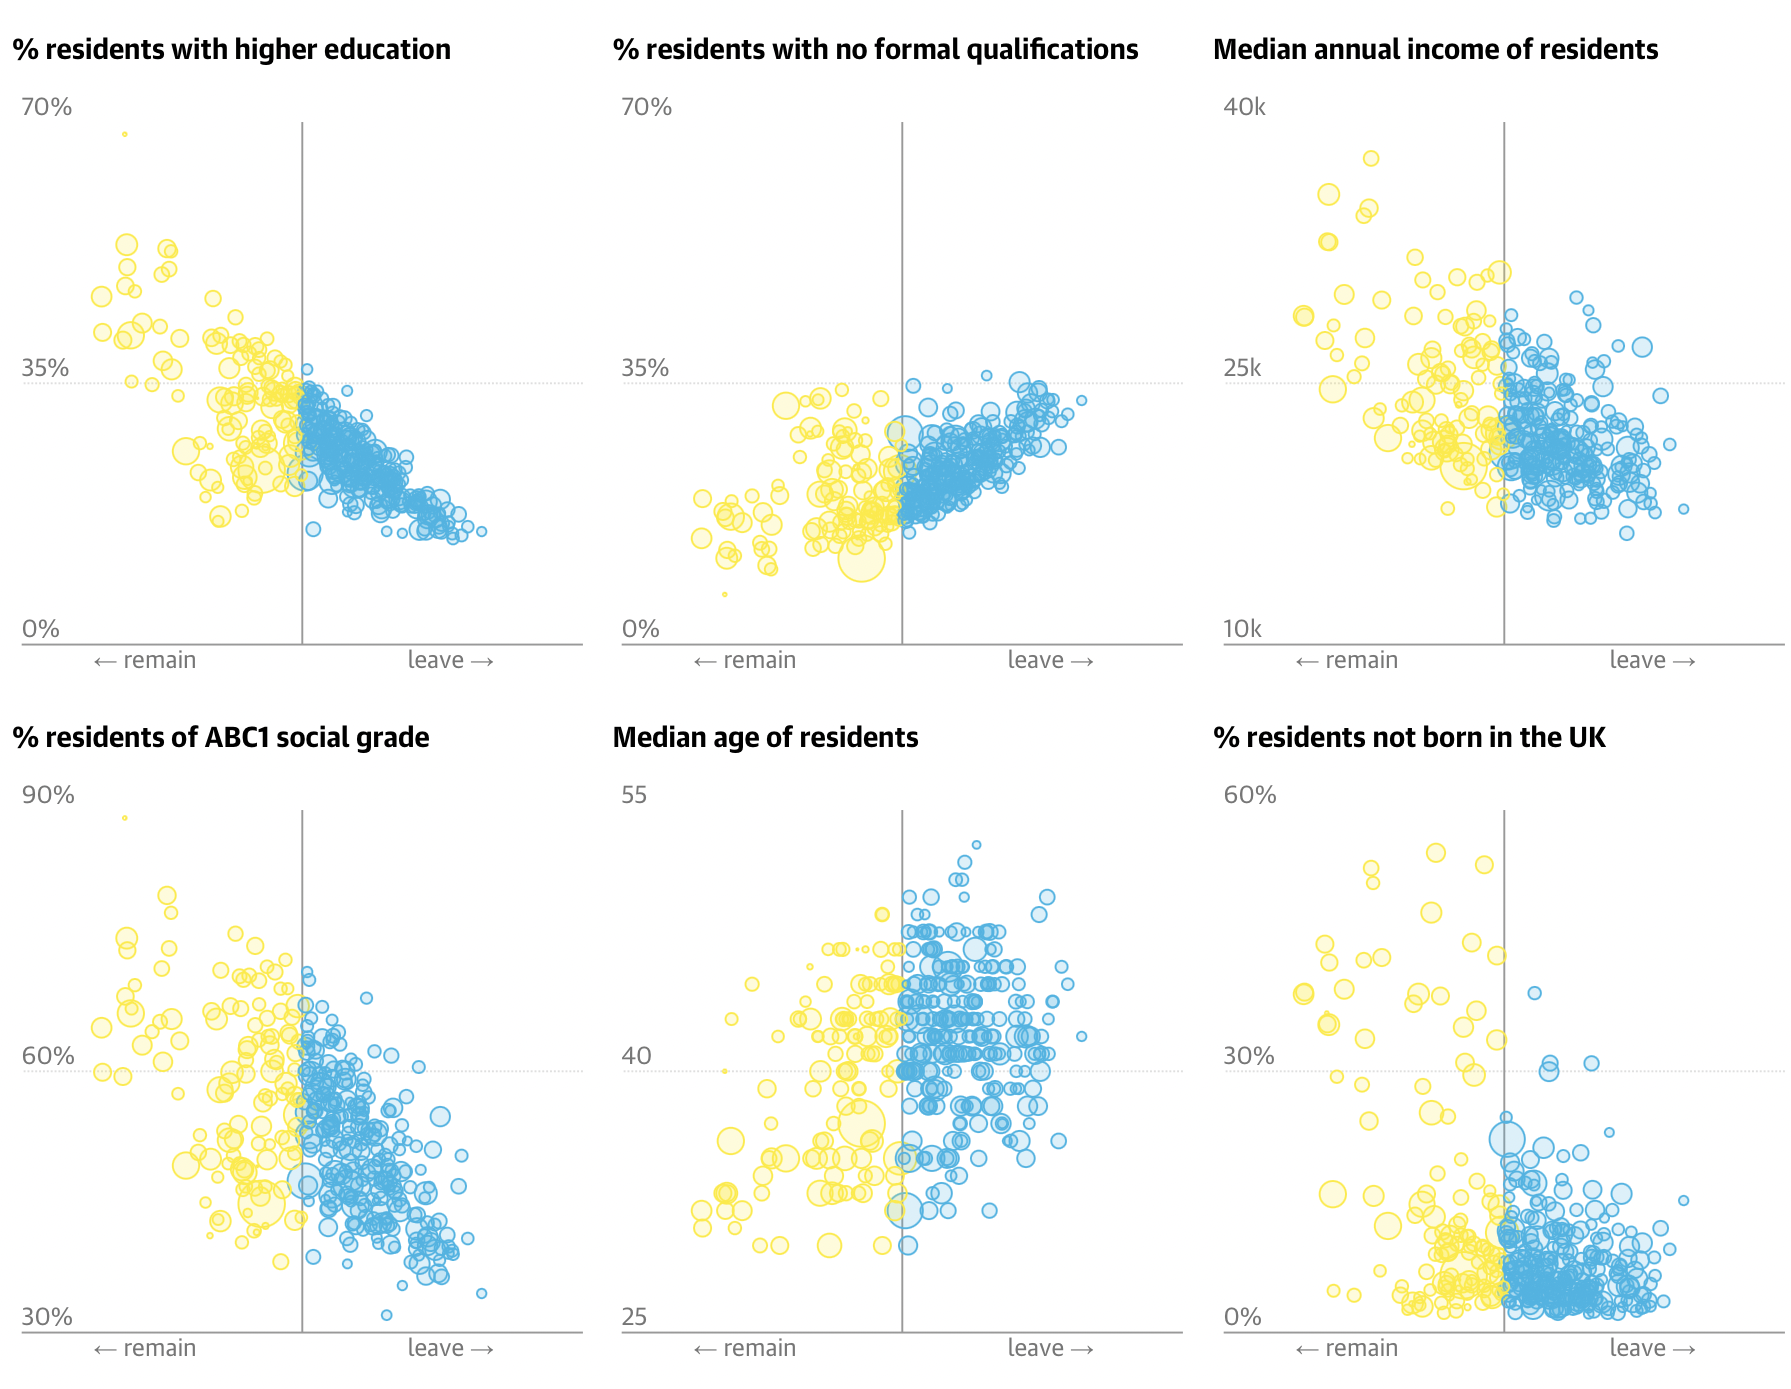

# Q2. Present the value of each coefficient estimate and calculate the 95% confidence interval. Which input would you say has the strongest effect and why? (0.5 mark)

In [4]:
zc = scipy.stats.norm.ppf(0.975)
min_interval = []
max_interval = []
for i in range(1,6):    
    estimate = Q1glm.params[i]
    standard_error = Q1glm.bse[i]
    CI_min = estimate - zc*standard_error
    CI_max = estimate + zc*standard_error
    min_interval.append(CI_min)
    max_interval.append(CI_max)
variable = ['abc1','notBornUK','medianIncome','medianAge','withHigherEd']
coeffs = [Q1glm.params[1],Q1glm.params[2],Q1glm.params[3],Q1glm.params[4],Q1glm.params[5]]
Coefficientdf = pd.DataFrame({'Variable':variable,'Coefficients':coeffs,'Min 95% Confidence Interval':min_interval,'Max 95% Confidence Interval':max_interval})
print(f'Table of logistic regression coefficients and there 95% confidence interval:')
display(Coefficientdf)

Table of logistic regression coefficients and there 95% confidence interval:


,Variable,Coefficients,Min 95% Confidence Interval,Max 95% Confidence Interval
0,abc1,-17.577998,-23.284272,-11.871724
1,notBornUK,-5.686138,-9.220608,-2.151669
2,medianIncome,6.385740,2.619275,10.152204
3,medianAge,-5.920877,-8.677687,-3.164067
4,withHigherEd,26.744259,19.735062,33.753456


### Visualising the coefficients:

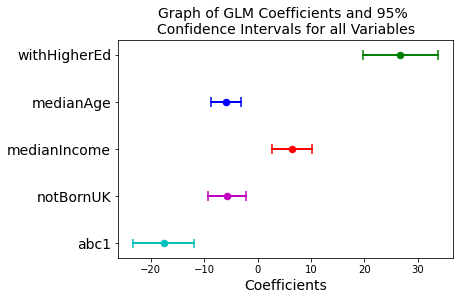

In [5]:
colours = ['c','m','r','b','g']
for i in range(5):
    plt.plot([Coefficientdf['Min 95% Confidence Interval'][i],Coefficientdf['Max 95% Confidence Interval'][i]],[i,i],colours[i],linewidth=2)
    plt.vlines(Coefficientdf['Min 95% Confidence Interval'][i],i-0.1,i+0.1,colours[i])
    plt.vlines(Coefficientdf['Max 95% Confidence Interval'][i],i-0.1,i+0.1,colours[i])
    plt.plot(Coefficientdf['Coefficients'][i],[i],f'{colours[i]}.',markersize=13,label=Coefficientdf['Variable'][i] )
plt.title('Graph of GLM Coefficients and 95% \nConfidence Intervals for all Variables',fontsize=14)
plt.xlabel('Coefficients',fontsize=14)
plt.yticks([0,1,2,3,4],Coefficientdf['Variable'],fontsize=14)
plt.show()

The input with the strongest effect is the one with the largest absolute value. Therefore, the strongest input is higher education with a coefficient of 26.7. This is likely due to those with greater levels of education being more informed about the decision they were making and fully understanding the ramifications of leaving the EU.

# Q3. Using aic, perform a model selection to determine which factors are useful to predict the result of the vote. You can use a ‘greedy’ input selection procedure, as follows: 
## (i) select the best model with 1 input; 

Results presented in order of smallest to largest AIC value (smallest wins).

In [6]:
formulaQ3i = ['voteBrexit ~ abc1','voteBrexit ~ notBornUK','voteBrexit ~ medianIncome','voteBrexit ~ medianAge','voteBrexit ~ withHigherEd']
input1aic = []
for i in range(len(formulaQ3i)):
    Q3glm = glm(formulaQ3i[i], brexitdf,family=sm.families.Binomial()).fit()
    input1aic.append(Q3glm.aic)
Q3idf = pd.DataFrame({'Formula Used':formulaQ3i,'AIC Value':input1aic})
Q3idf.sort_values('AIC Value', ascending=True).head(5)

,Formula Used,AIC Value
4,voteBrexit ~ withHigherEd,313.560406
2,voteBrexit ~ medianIncome,368.443704
0,voteBrexit ~ abc1,377.543730
1,voteBrexit ~ notBornUK,377.801279
3,voteBrexit ~ medianAge,401.276694


## (ii) fixing that input, select the best two-input model (i.e. try all the other 4 inputs with the one you selected first); 

Results presented in order of smallest to largest AIC value (smallest wins).

In [7]:
formulaQ3ii = ['voteBrexit ~ withHigherEd + abc1','voteBrexit ~ withHigherEd + notBornUK','voteBrexit ~ withHigherEd + medianIncome','voteBrexit ~ withHigherEd + medianAge']
input2aic = []
for i in range(len(formulaQ3ii)):
    Q3glm = glm(formulaQ3ii[i], brexitdf,family=sm.families.Binomial()).fit()
    input2aic.append(Q3glm.aic)
Q3iidf = pd.DataFrame({'Formula Used':formulaQ3ii,'AIC Value':input2aic})
Q3iidf.sort_values('AIC Value', ascending=True).head(5)

,Formula Used,AIC Value
0,voteBrexit ~ withHigherEd + abc1,286.545448
3,voteBrexit ~ withHigherEd + medianAge,303.309083
1,voteBrexit ~ withHigherEd + notBornUK,310.364400
2,voteBrexit ~ withHigherEd + medianIncome,315.525595


## (iii) select the best three-input model containing the first two inputs you chose, etc. At each stage evaluate the quality of fit using aic and stop if this gets worse;

Results presented in order of smallest to largest AIC value (smallest wins).

In [8]:
formulaQ3iii = ['voteBrexit ~ withHigherEd + abc1 + notBornUK','voteBrexit ~ withHigherEd + abc1 + medianIncome','voteBrexit ~ withHigherEd + abc1 + medianAge']
input3aic = []
for i in range(len(formulaQ3iii)):
    Q3glm = glm(formulaQ3iii[i], brexitdf,family=sm.families.Binomial()).fit()
    input3aic.append(Q3glm.aic)
Q3iiidf = pd.DataFrame({'Formula Used':formulaQ3iii,'AIC Value':input3aic})
Q3iiidf.sort_values('AIC Value', ascending=True).head(5)

,Formula Used,AIC Value
2,voteBrexit ~ withHigherEd + abc1 + medianAge,271.931705
1,voteBrexit ~ withHigherEd + abc1 + medianIncome,275.933919
0,voteBrexit ~ withHigherEd + abc1 + notBornUK,285.244378


## (iiii) select the best four-input model containing the first three inputs from the best model in the table above;

Results presented in order of smallest to largest AIC value (smallest wins).

In [9]:
formulaQ3iiii = ['voteBrexit ~ withHigherEd + abc1 + medianAge + notBornUK', 'voteBrexit ~ withHigherEd + abc1 + medianAge + medianIncome']
input4aic = []
for i in range(len(formulaQ3iiii)):
    Q3glm = glm(formulaQ3iiii[i], brexitdf,family=sm.families.Binomial()).fit()
    input4aic.append(Q3glm.aic)
Q3iiiidf = pd.DataFrame({'Formula Used':formulaQ3iiii,'AIC Value':input4aic})
pd.set_option('display.max_colwidth', None)
Q3iiiidf.sort_values('AIC Value', ascending=True).head(5)

,Formula Used,AIC Value
1,voteBrexit ~ withHigherEd + abc1 + medianAge + medianIncome,266.948847
0,voteBrexit ~ withHigherEd + abc1 + medianAge + notBornUK,269.114109


## (iiiii) Trying the five-input model (defined in Q1).

In [10]:
print(f'For the 5 input model the AIC value is: {Q1glm.aic}')

For the 5 input model the AIC value is: 259.385106720724


Therefore the AIC model selection found the 5 input model to be best as it resulted in the smallest AIC value of 259.
## Confirming AIC results with cross validation:

In [11]:
all_formulas = ['voteBrexit ~ abc1',
                'voteBrexit ~ notBornUK',
                'voteBrexit ~ medianIncome',
                'voteBrexit ~ medianAge',
                'voteBrexit ~ withHigherEd',
                'voteBrexit ~ withHigherEd + abc1',
                'voteBrexit ~ withHigherEd + notBornUK',
                'voteBrexit ~ withHigherEd + medianIncome',
                'voteBrexit ~ withHigherEd + medianAge',
                'voteBrexit ~ withHigherEd + abc1 + notBornUK',
                'voteBrexit ~ withHigherEd + abc1 + medianIncome',
                'voteBrexit ~ withHigherEd + abc1 + medianAge',
                'voteBrexit ~ withHigherEd + abc1 + medianAge + notBornUK', 
                'voteBrexit ~ withHigherEd + abc1 + medianAge + medianIncome',
                'voteBrexit ~ withHigherEd + abc1 + medianAge + medianIncome + notBornUK']

Counter({14: 61, 13: 11, 12: 10, 11: 7, 10: 4, 5: 3, 8: 3, 2: 1})


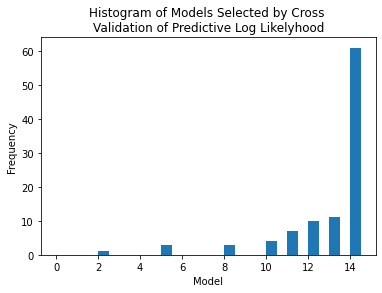

In [12]:
def sigmodal(x, glm_vals):
    final_x = 0
    for i in range(len(glm_vals)): 
        if glm_vals.index[i] == 'Intercept':
            final_x = final_x + glm_vals[i]      
        if glm_vals.index[i] != 'Intercept':
            final_x = final_x + glm_vals[i] * x[i-1]    
    return 1/(1 + np.exp(final_x))
winner = []
for i in range(100):
    conPLL = []
    train_AIC_cross, test_AIC_cross = train_test_split(brexitdf, test_size=0.2)
    all_X_i = [[test_AIC_cross['abc1']],
           [test_AIC_cross['notBornUK']],
           [test_AIC_cross['medianIncome']],
           [test_AIC_cross['medianAge']],
           [test_AIC_cross['withHigherEd']],
           [test_AIC_cross['withHigherEd'],test_AIC_cross['abc1']],
           [test_AIC_cross['withHigherEd'],test_AIC_cross['notBornUK']],
           [test_AIC_cross['withHigherEd'],test_AIC_cross['medianIncome']],
           [test_AIC_cross['withHigherEd'],test_AIC_cross['medianAge']],
           [test_AIC_cross['withHigherEd'],test_AIC_cross['abc1'],test_AIC_cross['notBornUK']],
           [test_AIC_cross['withHigherEd'],test_AIC_cross['abc1'],test_AIC_cross['medianIncome']],
           [test_AIC_cross['withHigherEd'],test_AIC_cross['abc1'],test_AIC_cross['medianAge']],
           [test_AIC_cross['withHigherEd'],test_AIC_cross['abc1'],test_AIC_cross['medianAge'],test_AIC_cross['notBornUK']],
           [test_AIC_cross['withHigherEd'],test_AIC_cross['abc1'],test_AIC_cross['medianAge'],test_AIC_cross['medianIncome']],
           [test_AIC_cross['withHigherEd'],test_AIC_cross['abc1'],test_AIC_cross['medianAge'],test_AIC_cross['medianIncome'],test_AIC_cross['notBornUK']]]
    for j in range(len(all_formulas)):
        current_model = glm(all_formulas[j], train_AIC_cross, family = sm.families.Binomial()).fit()
        glm_vals = current_model.params
        PLL = np.sum(test_AIC_cross['voteBrexit']*np.log(sigmodal(all_X_i[j],glm_vals)) + (1-test_AIC_cross['voteBrexit'])*(np.log(1-sigmodal(all_X_i[j],glm_vals)))) 
        conPLL.append(PLL)        
    winner.append(np.argmax(conPLL))
print(Counter(winner))
ModelNumber = np.arange(0,len(all_formulas),0.5)
plt.hist(winner,bins=ModelNumber)
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.title('Histogram of Models Selected by Cross \nValidation of Predictive Log Likelyhood')
plt.show()

From the cross validation above it is clear that the prefered model is model 14 (The 5 input model). This agrees with the AIC values which also select the 5 input model as the best one.

# Q4. Use the Scikit-Learn package to create a decision tree classification model. Visualise your model and intepret the fitted model;

Below is the plotted decison tree, a tree depth of 4 was chosen for this question as it provides enough depth to see how decision trees work.

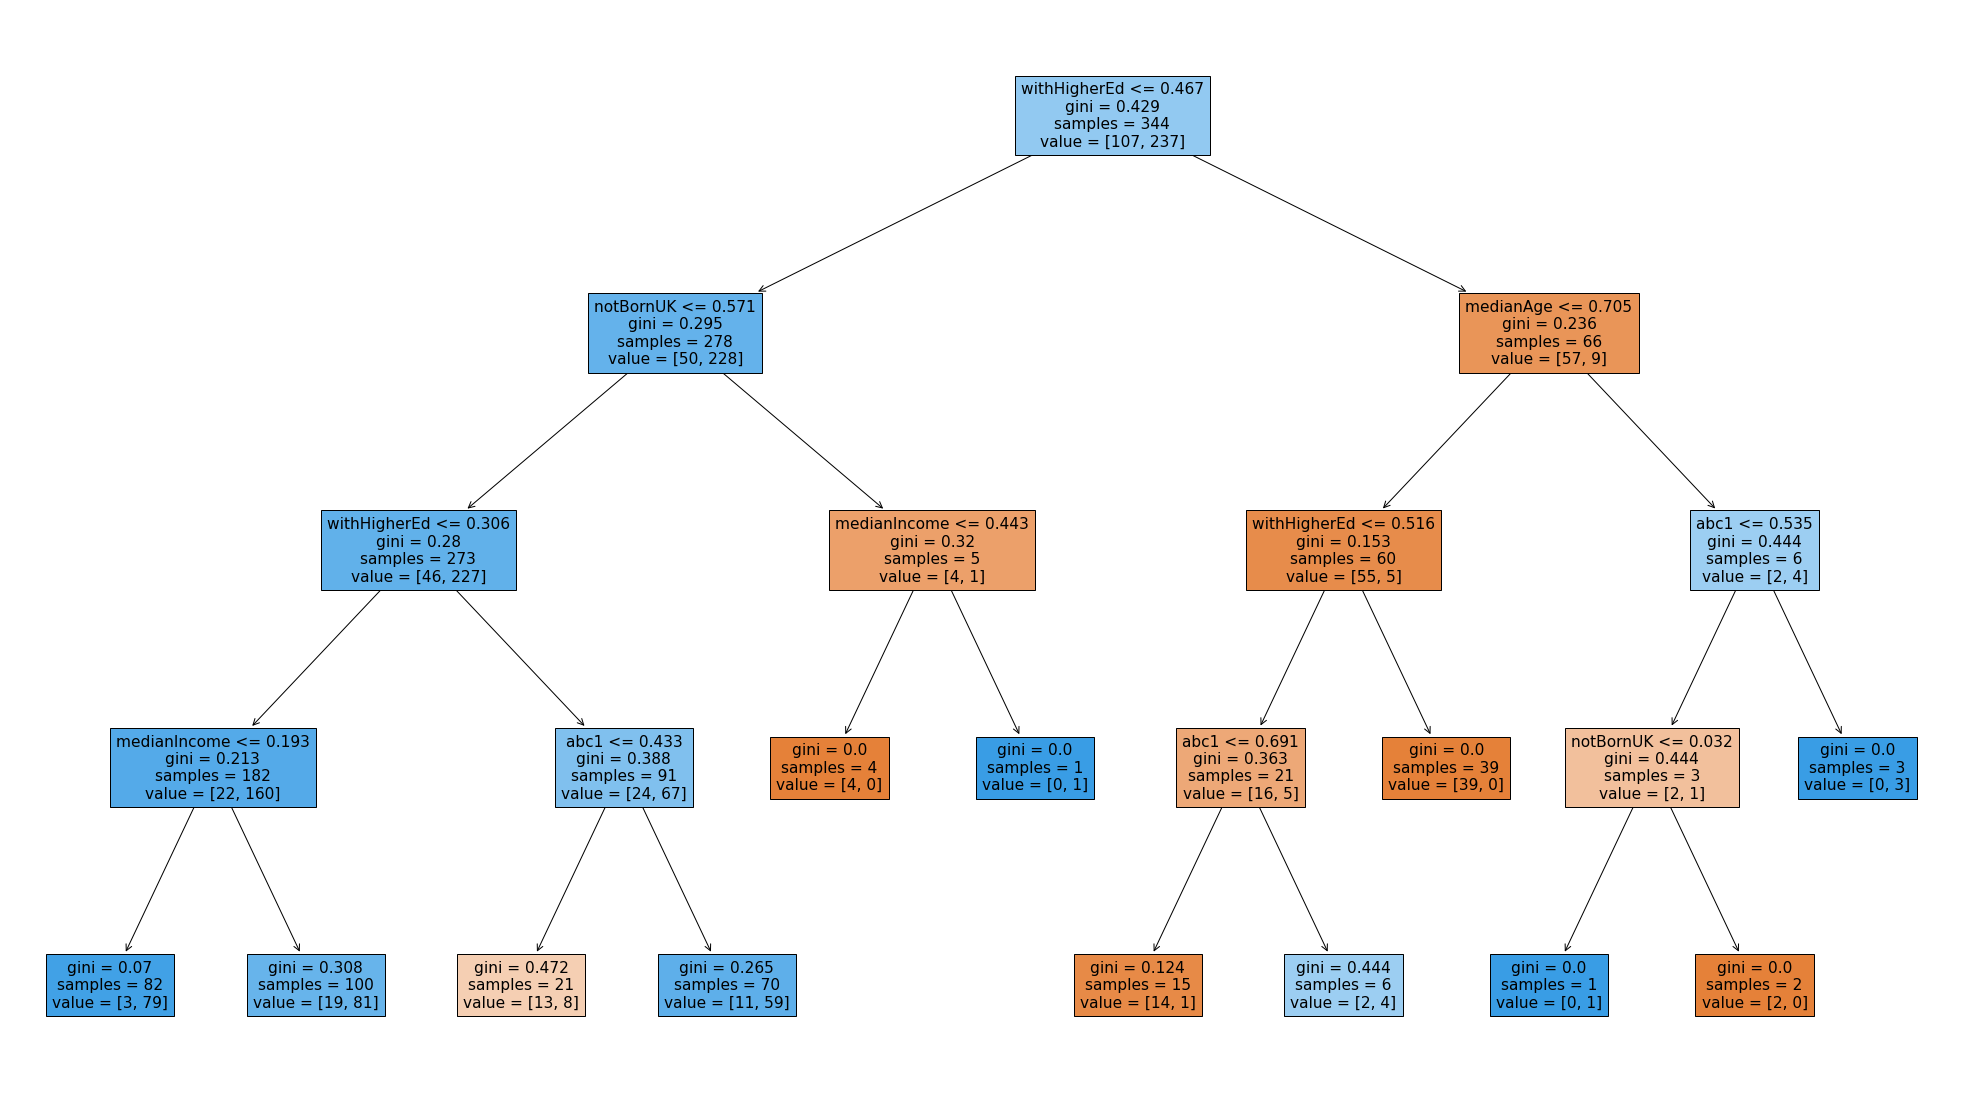

In [13]:
XP=pd.DataFrame({'withHigherEd':brexitdf['withHigherEd'],'medianIncome':brexitdf['medianIncome'],'abc1':brexitdf['abc1'],'medianAge':brexitdf['medianAge'],'notBornUK':brexitdf['notBornUK']})
YP=pd.DataFrame({'voteBrexit':brexitdf['voteBrexit']})
mytree = DecisionTreeClassifier(criterion='gini',max_depth=4)
mytree.fit(XP,YP)
plt.figure(figsize=(35,20))
tree.plot_tree(mytree,feature_names=['withHigherEd','medianIncome','abc1','medianAge','notBornUK'],filled=True)
plt.show()

### Cross validation on descison trees to determine optimal tree depth:
To find the tree depth that gives the most accurate results I cross validated depths of 1 to 8 on a 70/30 train test split repeated 100 times. The winner of each repetition was the model that predicted the test data most accuratly.

In [14]:
winner = []
for j in range(100):
    Cross_train, Cross_test = train_test_split(brexitdf, test_size=0.3)
    Cross_XP = pd.DataFrame({'withHigherEd':Cross_train['withHigherEd'],'medianIncome':Cross_train['medianIncome'],'abc1':Cross_train['abc1'],
                             'medianAge':Cross_train['medianAge'],'notBornUK':Cross_train['notBornUK']})
    Cross_YP = pd.DataFrame({'voteBrexit':Cross_train['voteBrexit']})
    accuracies = []
    for i in range(1,9):
        mytree_cross = DecisionTreeClassifier(criterion='gini',max_depth=i)
        mytree_cross.fit(Cross_XP,Cross_YP)
        predictions_cross_args = pd.DataFrame({'withHigherEd':Cross_test['withHigherEd'],'medianIncome':Cross_test['medianIncome'],'abc1':Cross_test['abc1'],
                                           'medianAge':Cross_test['medianAge'],'notBornUK':Cross_test['notBornUK']})
        predictions_cross = mytree_cross.predict(predictions_cross_args)
        report = metrics.classification_report(Cross_test['voteBrexit'], predictions_cross,output_dict=True)
        accuracies.append(report['accuracy'])
    winner.append(np.argmax(accuracies))

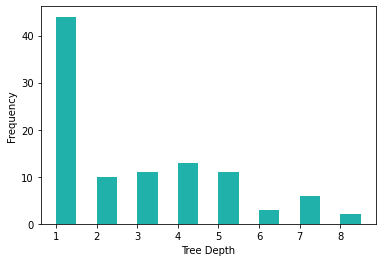

In [15]:
ModelNumber = np.arange(0,8,0.5)
plt.hist(winner,bins=ModelNumber,color='lightseagreen')
plt.xlabel("Tree Depth")
plt.ylabel("Frequency")
plt.xticks(range(0,8),range(1,9))
plt.show()

From the cross validation model above it is clear that the optimal model only has a tree depth of 1.

## The optimal descision tree is plotted below:

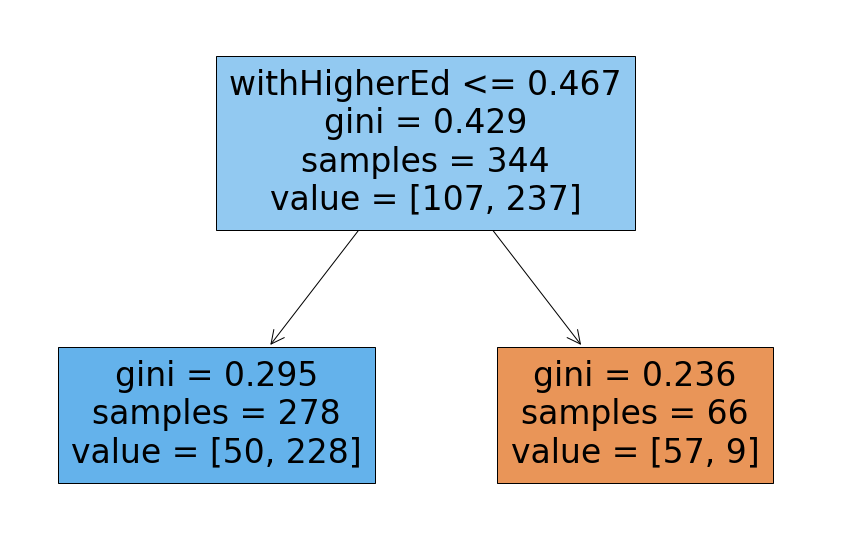

In [16]:
XP1=pd.DataFrame({'withHigherEd':brexitdf['withHigherEd'],'medianIncome':brexitdf['medianIncome'],'abc1':brexitdf['abc1'],'medianAge':brexitdf['medianAge'],'notBornUK':brexitdf['notBornUK']})
YP1=pd.DataFrame({'voteBrexit':brexitdf['voteBrexit']})
mytree1 = DecisionTreeClassifier(criterion='gini',max_depth=1)
mytree1.fit(XP1,YP1)
plt.figure(figsize=(15,10))
tree.plot_tree(mytree1,feature_names=['withHigherEd','medianIncome','abc1','medianAge','notBornUK'],filled=True)
plt.show()

# Q5. Compare your decision tree model and your logistic regression model. Do they attribute high importance to the same factors? How do you intepret each model to explain the referendum vote?

## Below is the calculations of a confusion matrix from which accuracy is found for both the logistic regression model and decision tree. Both of confusion matrices use the same train-test data so are directly comparable.

In [17]:
adj_prediction = list(adj_predictions)
for i in range(len(adj_prediction)):
    if adj_prediction[i] < 0.5:
        adj_prediction[i] = False
    if adj_prediction[i] > 0.5:
        adj_prediction[i] = True
confusion_matrix1 = metrics.confusion_matrix(test_data['voteBrexit'], adj_prediction)
print('Confusion Matrix For Logistic Regression Model:')
print(f'True Negative: {confusion_matrix1[0][0]}\nFalse Positive: {confusion_matrix1[0][1]}\nFalse Negative: {confusion_matrix1[1][0]}\nTrue Positive: {confusion_matrix1[1][1]}')
print(f'Accuracy of Model: {round(100*(confusion_matrix1[0][0]+confusion_matrix1[1][1])/len(adj_prediction),1)}%')

Confusion Matrix For Logistic Regression Model:
True Negative: 22
False Positive: 10
False Negative: 4
True Positive: 68
Accuracy of Model: 86.5%


In [18]:
XPtrain=pd.DataFrame({'withHigherEd':train_data['withHigherEd'],'medianIncome':train_data['medianIncome'],'abc1':train_data['abc1'],'medianAge':train_data['medianAge'],'notBornUK':train_data['notBornUK']})
YPtrain=pd.DataFrame({'voteBrexit':train_data['voteBrexit']})
mytreetrain = DecisionTreeClassifier(criterion='gini',max_depth=1)
mytreetrain.fit(XPtrain,YPtrain)
predictions_testdf = pd.DataFrame({'withHigherEd':test_data['withHigherEd'],'medianIncome':test_data['medianIncome'],'abc1':test_data['abc1'],'medianAge':test_data['medianAge'],'notBornUK':test_data['notBornUK']})
predictions_tree = mytreetrain.predict(predictions_testdf)
confusion_matrix = metrics.confusion_matrix(test_data['voteBrexit'], predictions_tree)
print('Confusion Matrix For Decision Tree Model:')
print(f'True Negative: {confusion_matrix[0][0]}\nFalse Positive: {confusion_matrix[0][1]}\nFalse Negative: {confusion_matrix[1][0]}\nTrue Positive: {confusion_matrix[1][1]}')
print(f'Accuracy of Model: {round(100*(confusion_matrix[0][0]+confusion_matrix[1][1])/len(adj_prediction),1)}%')
if 100*(confusion_matrix1[0][0]+confusion_matrix1[1][1])/len(adj_prediction) > 100*(confusion_matrix[0][0]+confusion_matrix[1][1])/len(adj_prediction):
    print(f'\nThe accuracy of the logistic regression model is better as it can predict results to an accuracy of {round(100*(confusion_matrix1[0][0]+confusion_matrix1[1][1])/len(adj_prediction),1)}% compared to the {round(100*(confusion_matrix[0][0]+confusion_matrix[1][1])/len(adj_prediction),1)}% for the descision tree model.')
else:
    print(f'\nThe accuracy of the decision tree model is better as it can predict results to an accuracy of {round(100*(confusion_matrix[0][0]+confusion_matrix[1][1])/len(adj_prediction),1)}% compared to the {round(100*(confusion_matrix1[0][0]+confusion_matrix1[1][1])/len(adj_prediction),1)}% for the logistic regression model.')

Confusion Matrix For Decision Tree Model:
True Negative: 14
False Positive: 18
False Negative: 3
True Positive: 69
Accuracy of Model: 79.8%

The accuracy of the logistic regression model is better as it can predict results to an accuracy of 86.5% compared to the 79.8% for the descision tree model.


## Below is the calcualtions of attribute importance for both models:
for the decision tree a tree depth of 4 was used as if the more optimal model with depth of 1 was used one feature would get all the importance and not give a result comporable to the logistic regression model.

Table of attribute importance for both models:


,Variable,Decison Tree,Tree Rank,Logistic Regression,Logistic Rank
0,withHigherEd,0.691961,1,0.429178,1
1,medianIncome,0.047768,4,0.102475,3
2,abc1,0.145223,2,0.282083,2
3,medianAge,0.047656,5,0.095015,4
4,notBornUK,0.067393,3,0.091248,5


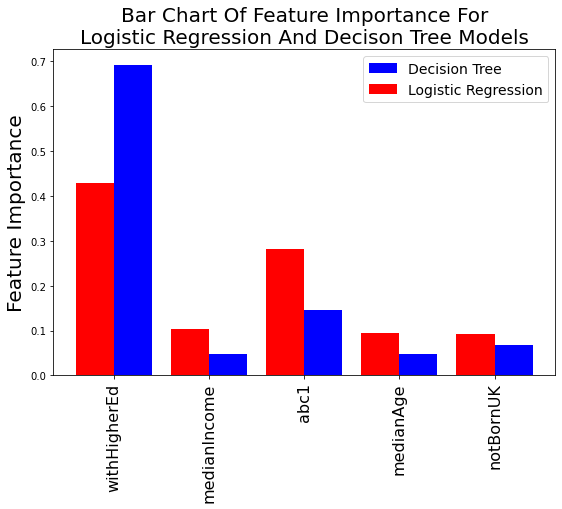

In [19]:
labels = ['withHigherEd','medianIncome','abc1','medianAge','notBornUK']
coeffsO = [coeffs[4],coeffs[2],coeffs[0],coeffs[3],coeffs[1]]
normalisation_factor = 1/sum(np.abs(coeffsO))
normalised_coeffs = np.multiply(np.abs(coeffsO),normalisation_factor)
importances = mytree.feature_importances_
all_importances = pd.DataFrame({'Variable':labels,'Decison Tree':importances,'Tree Rank':[1,4,2,5,3],'Logistic Regression':normalised_coeffs,'Logistic Rank':[1,3,2,4,5]})
print('Table of attribute importance for both models:')
display(all_importances)
plt.figure(figsize=(9,6))
plt.bar(np.add([1,2,3,4,5],0.2), importances, color='b',width=0.4,label='Decision Tree')
plt.bar(np.subtract([1,2,3,4,5],0.2), normalised_coeffs, color='r',width=0.4,label='Logistic Regression')
plt.xticks([1,2,3,4,5],labels,rotation='vertical',fontsize=16)
plt.ylabel('Feature Importance',fontsize=20)
plt.legend(fontsize=14)
plt.title('Bar Chart Of Feature Importance For\nLogistic Regression And Decison Tree Models',fontsize=20)
plt.show()

Both models share the 2 most important features of 'with higher education' and 'abc1 social grade'.

## Comparing ROC and AUC values for each model:

Below is the plotted ROC curve and the AUC (area under cuve for each model). The closer the AUC is to 1 the more accurate the model is. The plot shows false positive rates plotted vs true positive rates. The curves for the 5 input logistic regression model and the 1 depth decision tree model are plotted.

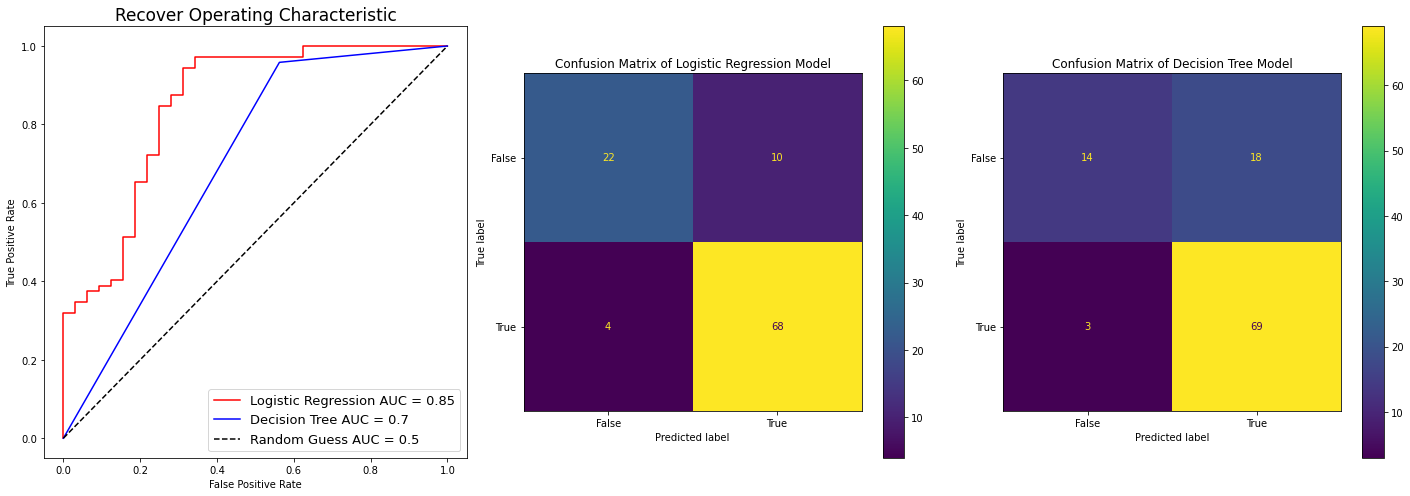

In [20]:
logisticROC = metrics.roc_curve(test_data['voteBrexit'],adj_predictions)
treeProbs = mytreetrain.predict_proba(predictions_testdf)[:,1]
treeROC = metrics.roc_curve(test_data['voteBrexit'], treeProbs)
logisticAUC = metrics.auc(logisticROC[0],logisticROC[1])
treeAUC = metrics.auc(treeROC[0],treeROC[1])

fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 7))

ax1.plot(logisticROC[0],logisticROC[1],'r',label=f'Logistic Regression AUC = {round(logisticAUC,2)}')
ax1.plot(treeROC[0],treeROC[1],'b',label=f'Decision Tree AUC = {round(treeAUC,2)}')
ax1.plot([0,1],[0,1],'--k',label=f'Random Guess AUC = {0.5}')
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.set_title('Recover Operating Characteristic',fontsize=17)
ax1.legend(fontsize=13)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])
cm_display.plot(ax=ax2)
ax2.set_title('Confusion Matrix of Logistic Regression Model')

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(ax=ax3)
ax3.set_title('Confusion Matrix of Decision Tree Model')
fig.tight_layout()

The graphs above show that the logistic regression model predicts resutls to a higher accuracy than the decision tree model as the AUC value is closer to 1.

# Q6. Which model would you use if you were explaining the results for a newspaper article, and why?

If I was explaining the results for a news paper article I would use the logistic regression model as it can be used to produce/explain graphs that can be easily visualised making them more appealing for the reader or simpliy explain the direction of each coefficients. The decison tree would be harder for readers the understand at a glance or get the general trends of the data from making it a less favoured option. However, for this data the optimal decison tree only has a tree depth of one which would make it easy to understand but the small amount of insight that decison tree could give could easily be seen in the graphs from the logistic regression model by looking visually indentifying the stringest trends. Also the logistic regression model has a higher accuracy compared to the decision tree model.

## Additional Work: finding optimal split values for each parameter to minimise the gini value.

Below is a function that determines the gini value of a given split in a list of data.

In [21]:
def average_G(split_value, data, input='weight'):
    group1,group1res = [],[]
    group2,group2res = [],[]
    for i in range(len(brexitdf[data])):
        if brexitdf[data][i] < split_value:
            group1.append(brexitdf[data][i])
            group1res.append(brexitdf['voteBrexit'][i])
        else:
            group2.append(brexitdf[data][i])
            group2res.append(brexitdf['voteBrexit'][i])
    g1T = 0
    for i in range(len(group1)):
        if group1res[i] == True:
            g1T = g1T + 1
    g2T = 0
    for i in range(len(group2)):
        if group2res[i] == True:
            g2T = g2T + 1
    p1 = g1T/len(group1)
    p2 = g2T/len(group2) 
    G1 = p1*(1-p1)
    G2 = p2*(1-p2)
    G = (G1*len(group1) + G2*len(group2))/(len(group1)+len(group2))
    return G

Below I have plotted the graphs of gini values vs split value and then plotted the optimal gini value as a horizontal line on the graphs I plotted earlier to show how it segments the data. I also calcualted the accuracy of the split given by calcualting how many data points fell into each segment (True True, False True, True False and False False). Accuracy is equal to number True True + number True False over all number of all data points :

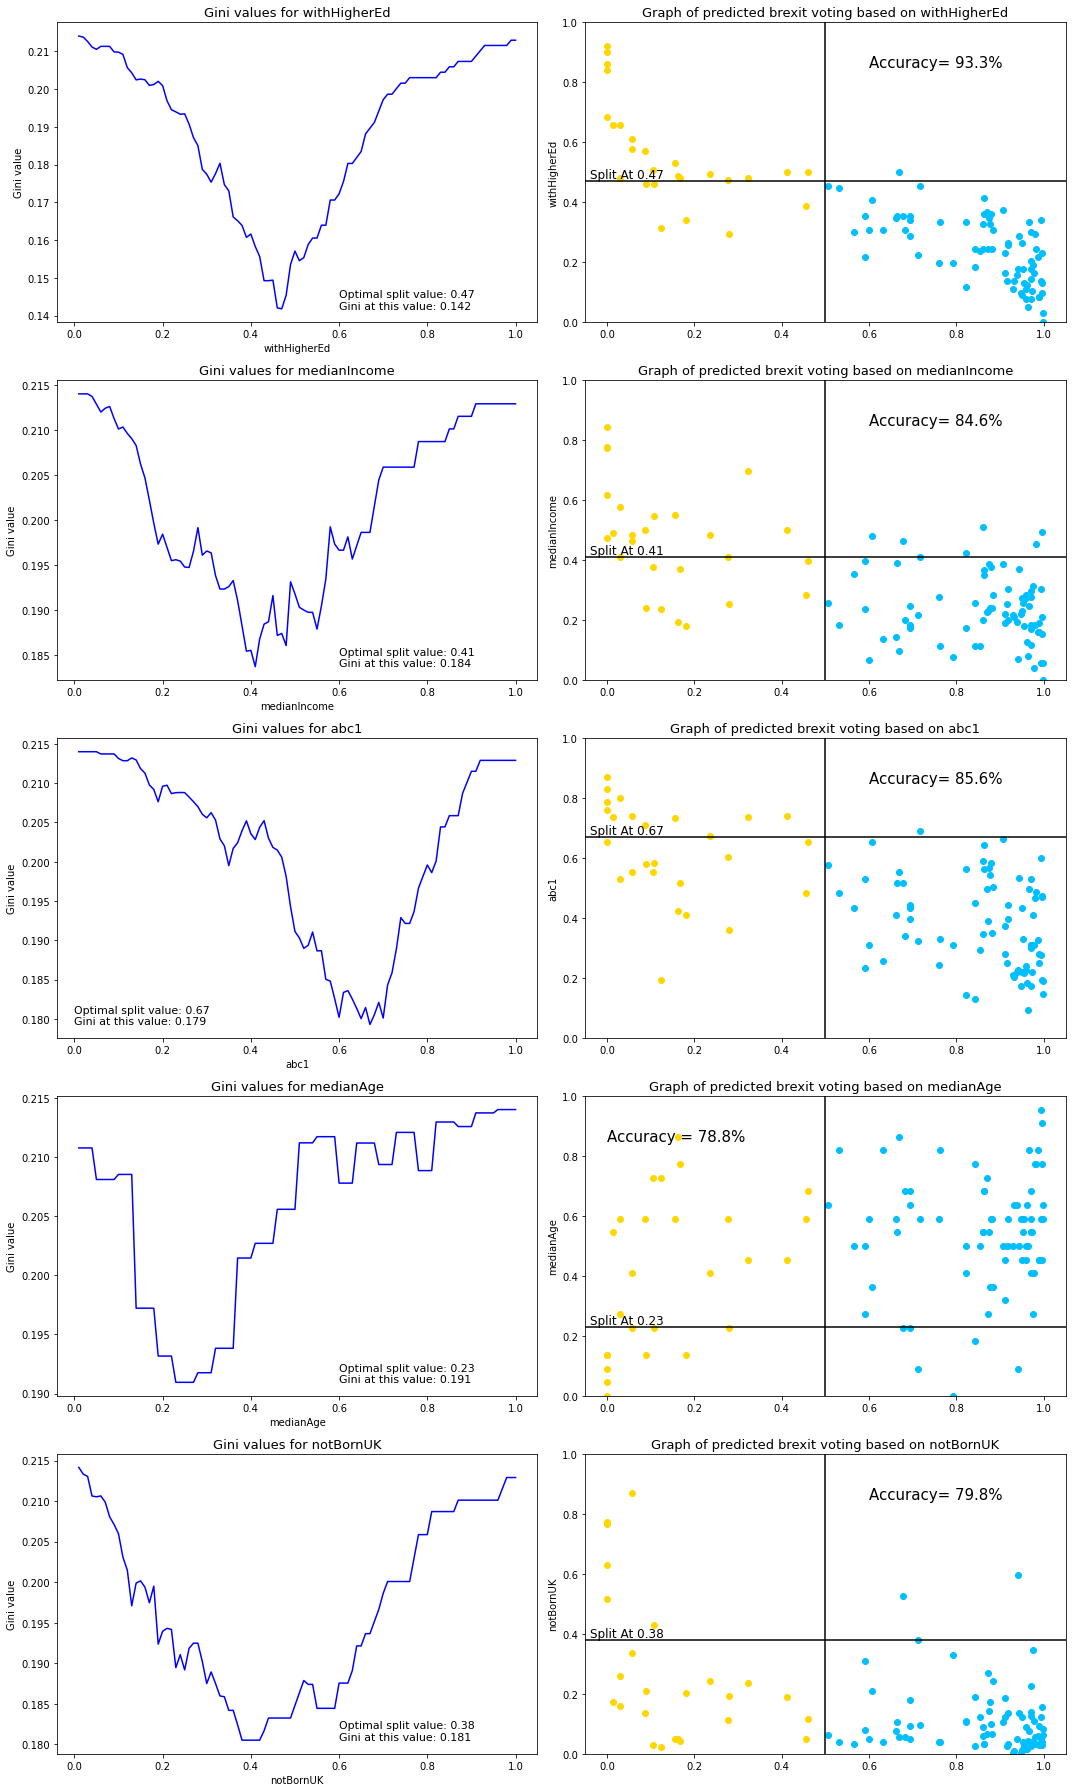

In [22]:

datas = ['withHigherEd','medianIncome','abc1','medianAge','notBornUK']
list_predict = list(adj_predictions)
fig, axs = plt.subplots(5, 2,figsize=(15, 25))
for j in range(len(datas)):
    x = np.linspace(0.01,1,100)
    ginis = []
    for i in x:
        ginis.append(average_G(i,datas[j]))
    top_left = 0
    top_right = 0
    bottom_left = 0
    bottom_right = 0
    for g in range(len(test_data[datas[j]])):
        if test_data.iloc[g][datas[j]] > x[ginis.index(min(ginis))] and list_predict[g] < 0.5:
            top_left = top_left + 1
        if test_data.iloc[g][datas[j]] > x[ginis.index(min(ginis))] and list_predict[g] > 0.5:
            top_right = top_right + 1
        if test_data.iloc[g][datas[j]] < x[ginis.index(min(ginis))] and list_predict[g] < 0.5:
            bottom_left = bottom_left + 1
        if test_data.iloc[g][datas[j]] < x[ginis.index(min(ginis))] and list_predict[g] > 0.5:
            bottom_right = bottom_right + 1
    axs[j,0].plot(x,ginis,'b')
    axs[j,0].set_ylabel('Gini value')
    axs[j,0].set_xlabel(f'{datas[j]}')
    axs[j,0].set_title(f'Gini values for {datas[j]}',fontsize=13)
    if x[ginis.index(min(ginis))] > 0.5:
        axs[j,0].annotate(f'Optimal split value: {round(x[ginis.index(min(ginis))],3)}\nGini at this value: {round(min(ginis),3)}',
                     xy=(x[ginis.index(min(ginis))],min(ginis)),xytext=(0,min(ginis)),fontsize=11)        
    if x[ginis.index(min(ginis))] < 0.5:
        axs[j,0].annotate(f'Optimal split value: {round(x[ginis.index(min(ginis))],3)}\nGini at this value: {round(min(ginis),3)}',
                     xy=(x[ginis.index(min(ginis))],min(ginis)),xytext=(0.6,min(ginis)),fontsize=11)
    
    axs[j,1].plot(adj_predictions[adj_predictions>0.5],test_data[datas[j]][adj_predictions>0.5],'o',color='deepskyblue')
    axs[j,1].plot(adj_predictions[adj_predictions<0.5],test_data[datas[j]][adj_predictions<0.5],'o',color='gold')
    axs[j,1].hlines(x[ginis.index(min(ginis))],-0.05,1.05,'k')
    axs[j,1].annotate(f'Split At {round(x[ginis.index(min(ginis))],3)}',xy=(0,x[ginis.index(min(ginis))]),xytext=(-0.04,x[ginis.index(min(ginis))]+0.01),fontsize=12)
    axs[j,1].vlines(0.5,0,1,'k')
    axs[j,1].set_ylim(0,1)
    axs[j,1].set_xlim(-0.05,1.05)   
    axs[j,1].set_title(f'Graph of predicted brexit voting based on {datas[j]}',fontsize=13)
    axs[j,1].set_ylabel(f'{datas[j]}')
    if x[ginis.index(min(ginis))] > 0.3:
        axs[j,1].annotate(f'Accuracy= {round(100*(top_left+bottom_right)/(top_left+bottom_right+top_right+bottom_left),1)}%',xy=(0.5,0.5),xytext=(0.6,0.85),fontsize = 15)
        axs[j,1].fill_between
    if x[ginis.index(min(ginis))] < 0.3:
        axs[j,1].annotate(f'Accuracy = {round(100*(bottom_left+top_right)/(top_left+bottom_right+top_right+bottom_left),1)}%',xy=(0.5,0.5),xytext=(0,0.85),fontsize = 15)
        
fig.tight_layout()
plt.show()

The Graphs above agree with the optimal decison tree as the highest accuracy arises from splitting the withHigherEd at a value of 0.47. The one depth tree plotted earlier split at a value of 0.467.

# Self Assessment:

1) I sucessfully fitted a logisitc regression model using all imputs and displayed its summary. I also explained the direction or effect of each input variable on the final result. I then did a train test split so using my model so that I could replicate the Guardian plots and compare them. I sucessfully did this, and each graph matched its Guardian counter part and showed the same trends. (1.5/1.5)

2) I sucessfully found the 95% confidence level for each coeiffeicnt and presented both in a table and graphically. I iendtifed the coeiffiecnt with the greatest effect on the model and explained my reasoning for this. (0.5/0.5)

3) I sucessfully preformed the greedy input selection to find the optimal model acording to the AIC values. I then cross validated all the models used in the greedy input selction to confirm the same winner. (2/2)

4) I sucessfully created a decison tree clasification model and visualised it. I then cross validated various tree depths to determine the optimal tree based on accuracy of predicted results. I then plotted the optimal tree. (1/1)

5) I sucessfully compared my logistic regression model and decsion tree model by identifying the accuracy of each model when tranied and tested on the same data. I also determied feature importance and plotted a bar graph showing the key features for both models. The key features of both models agreed. I also plotted ROC curves for both models and found AUC values to compare the accuracy of both models. (1/1)

6) I described my prefered model for use in a newspaper article and gave my reasoning behind this. (1/1)

7) My work is presented neatly and in a clear way. My plots are visually appealing and I usilised markdown cells effectivley. (2/2)

8) In Q1 I used a train test split to recreate all graphs from the Guradian Website. In Q2 I plotted my coefficients and there 95% confidence levels. In Q3 I cross validated my resutls to confirm the AIC greedy input selection optimal model. In Q4 I cross validated tree depths to determine the optimal tree. In Q5 I compared my models on their accuracy when testing them on the same train test split of data aswell as finding ROC plots and AUC values. For additional work I found and plotted the optiaml split value for each parameter to minimise the gini value. I then showed the accuracy of this split on the graphs from Q1. (1/1)

**Overall: 10/10**
